In [2]:
import cv2
import math
import numpy as np
import sys
from matplotlib import pyplot as plt


In [5]:

def apply_mask(matrix, mask, fill_value):
    masked = np.ma.array(matrix, mask=mask, fill_value=fill_value)
    return masked.filled()

def apply_threshold(matrix, low_value, high_value):
    low_mask = matrix < low_value
    matrix = apply_mask(matrix, low_mask, low_value)

    high_mask = matrix > high_value
    matrix = apply_mask(matrix, high_mask, high_value)

    return matrix

def simplest_cb(img, percent):
    #kiem tra anh mau
    assert img.shape[2] == 3
    assert percent > 0 and percent < 100

    half_percent = percent / 200.0

    #tach anh ra cac he mau rgb
    channels = cv2.split(img)

    out_channels = []
    for channel in channels:
        assert len(channel.shape) == 2
        #tim gia tri cao va thap nhat cua pixel mau trong anh dua vao percent
        height, width = channel.shape
        vec_size = width * height
        flat = channel.reshape(vec_size)

        assert len(flat.shape) == 1
        flat = np.sort(flat)

        n_cols = flat.shape[0]

        low_val  = flat[math.floor(n_cols * half_percent)]
        high_val = flat[math.ceil( n_cols * (1.0 - half_percent))]

        print("Lowval: ", low_val)
        print("Highval: ", high_val)

        #apply cac gia tri vua tim duoc 
        thresholded = apply_threshold(channel, low_val, high_val)
        # chuan hoa lai cac ma tran theo he mau
        normalized = cv2.normalize(thresholded, thresholded.copy(), 0, 255, cv2.NORM_MINMAX)
        out_channels.append(normalized)
#gop hinh anh
    return cv2.merge(out_channels)

#Dieu chinh kich thuoc hinh anh(co hay khong deu ok)git
def ResizeWithAspectRatio(image, width=None, height=None, inter=cv2.INTER_AREA):
    dim = None
    (h, w) = image.shape[:2]

    if width is None and height is None:
        return image
    if width is None:
        r = height / float(h)
        dim = (int(w * r), height)
    else:
        r = width / float(w)
        dim = (width, int(h * r))

    return cv2.resize(image, dim, interpolation=inter)

if __name__ == '__main__':
    img = cv2.imread(r'C:\Users\ADMIN\CPV301\CPV\Workshop2\1259119.jpg')
    out = simplest_cb(img, 7)
    img1=ResizeWithAspectRatio(img,400,300)
    out1=ResizeWithAspectRatio(out,400,300)
    cv2.imshow("before", img)
    cv2.imshow("after", out)
    cv2.waitKey(0)

Lowval:  0
Highval:  169
Lowval:  8
Highval:  209
Lowval:  12
Highval:  254


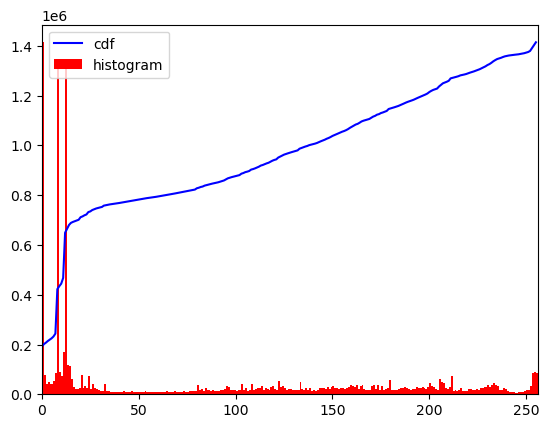

In [6]:
hist,bins = np.histogram(img.flatten(),256,[0,256])
#tinh cdf của hình ảnh
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

-1

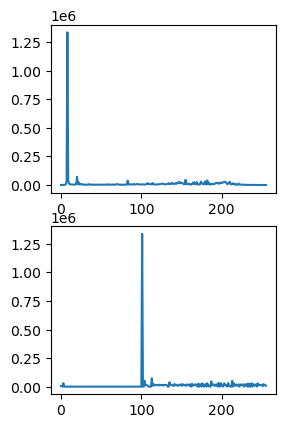

In [4]:
#dùng ảnh trắng đen để perform hist equal

img2=cv2.imread(r'C:\Users\ADMIN\CPV301\CPV\Workshop2\1259119.jpg',0)
#calcHist:tinh toan su phan bo cuong do sang cua hinh anh de ve bieu do
hist1 = cv2.calcHist([img2],[0],None,[256],[0,256])
#equalizeHist: dãn các khoảng phân bố dày đặc pixel và co các khoảng phân bố thưa pixel.
img3 = cv2.equalizeHist(img2)
hist2 = cv2.calcHist([img3],[0],None,[256],[0,256])

#hiển thị biểu đồ và hình ảnh trước và sau xử lý
plt.subplot(222),plt.plot(hist1);
plt.subplot(224),plt.plot(hist2);

cv2.imshow('before',img2)
cv2.imshow('after',img3)
cv2.waitKey(0)

In [7]:
#Dùng ảnh màu để perform hist equal

#convert hệ màu RGB qua hệ màu YUV
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

# convert ngược lại
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

cv2.imshow('color hist',img_output)
cv2.waitKey(0)

-1

In [14]:
img2=cv2.blur(img, (5,5))
cv2.imshow('blur',img2)
cv2.waitKey(0)


111